<a href="https://colab.research.google.com/github/moyeed/Regression_ames_housing_data/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Machine Learning Assignment-2
# Name and z-Id: Mohammed Abdul Moyeed (Z-1912165)


# install Dependencies

In [31]:
!pip install --upgrade pandas==1.3.5
!pip install --upgrade xlrd==1.2

## Import statements

In [32]:
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.exceptions import ConvergenceWarning
from sklearn.utils._testing import ignore_warnings
import os
import json
from urllib.request import urlretrieve
import pandas as pd
from scipy import stats



## Define constants and required functions

In [33]:
#All continous varibales except salePrice as it is target.
CONTINOUS_VARS = [['Lot Frontage','Lot Area','Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2'],
                  ['Bsmt Unf SF','Total Bsmt SF','1st Flr SF','2nd Flr SF','Low Qual Fin SF'],
                  ['Gr Liv Area','Garage Area','Wood Deck SF','Open Porch SF','Enclosed Porch'],
                  ['3Ssn Porch','Screen Porch','Pool Area','Misc Val','SalePrice']]
# all nominal variables
CATEGORICAL_FEATURES_COLUMNS = ['MS SubClass','MS Zoning','Street','Alley','Land Contour','Lot Config','Neighborhood','Condition 1','Condition 2','Bldg Type','House Style','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation','Heating','Central Air','Garage Type','Misc Feature','Sale Type','Sale Condition']

# all ordinal variables with their values mapped
ORDINAL_FEATURES_COLUMNS = [
('Lot Shape', ['Reg', 'IR1', 'IR2', 'IR3']),
  ('Utilities', ['AllPub', 'NoSewr', 'NoSeWa', 'ELO']),
  ('Land Slope', ['Gtl', 'Mod', 'Sev']),
  ('Overall Qual', [x for x in range(10,0,-1)]),
  ('Overall Cond', [x for x in range(10,0,-1)]),
  ('Exter Qual', ['Ex', 'Gd', 'TA', 'Fa', 'Po']),
  ('Exter Cond', ['Ex', 'Gd', 'TA', 'Fa', 'Po']),
  ('Bsmt Qual', ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']),
  ('Bsmt Cond', ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']),
  ('Bsmt Exposure', ['Gd', 'Av', 'Mn', 'No', 'NA']),
  ('BsmtFin Type 1', ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA']),
  ('BsmtFin Type 2', ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA']),
  ('Heating QC', ['Ex', 'Gd', 'TA', 'Fa', 'Po']),
  ('Electrical', ['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix', 'NA']),
  ('Kitchen Qual', ['Ex', 'Gd', 'TA', 'Fa', 'Po']),
  ('Functional', ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal']),
  ('Fireplace Qu', ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']),
  ('Garage Finish', ['Fin', 'RFn', 'Unf', 'NA']),
  ('Garage Qual', ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']),
  ('Garage Cond', ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']),
  ('Paved Drive', ['Y', 'P', 'N']),
  ('Pool QC', ['Ex', 'Gd', 'TA', 'Fa', 'NA']),
  ('Fence', ['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'NA'])
]

# all models being analysed in this assignment with thier details
MODELS = {"linear_reg" : {"model":LinearRegression(),
                          "reg_params":None
                          } ,
          "ridge_reg":{"model":Ridge(),
                          "reg_params":{'ridge__alpha':  np.logspace(-3, 3, 10)}
                          } ,
          "lasso_reg":{"model":Lasso(),
                          "reg_params":{'lasso__alpha':  np.logspace(-3, 3, 10)}
                          },
          "elastic_reg":{"model":ElasticNet(),
                          "reg_params":{'elasticnet__alpha':  np.logspace(-3, 3, 10)}
                          }}



def download_data(url = "https://github.com/moyeed/Regression_ames_housing_data/raw/96f09b7436e158175129739f2b2680d382b8d065/AmesHousing.xls", file_name = "AmesHousing.xls"):
  '''This function download s the ames data from any given url, Takes two parameters\n
        url : url of file to download from \n
        file_name = file_name to store the downlaoded file'''
  url = url
  fileName = file_name
  if not os.path.exists(fileName):
    urlretrieve(url, fileName)

def read_data(file_name = "AmesHousing.xls"):
  ''' This function reads the data from given file name and returns a pandas dataframe '''
  ames_data = pd.read_excel( "/content/"+file_name) 
  return ames_data

def univariate_dist_continous_vars(data):
  ''' This function plots the univariiate disctribution of all 20 continuous features in the dataset '''
  fig,ax = plt.subplots(4,5, figsize=(25,25))
  for row in range(4):
    for col in range(5):
      if(row == 3 and col == 4):
        ax[row,col] = None
        break
      ax[row,col].scatter(data.index,data[CONTINOUS_VARS[row][col]])
      ax[row,col].set_xlabel("Index")
      ax[row,col].set_ylabel(CONTINOUS_VARS[row][col])
      ax[row,col].set_title(CONTINOUS_VARS[row][col])
      
  
  plt.show()

def bivariate_dist_continous_vars(data,target = "SalePrice"):
  ''' This function plots the bivariiate distribution of all 20 continuous features in the dataset vs SalePrice '''
  fig,ax = plt.subplots(4,5, figsize=(32,32))
  for row in range(4):
    for col in range(5):
      ax[row,col].scatter(data[CONTINOUS_VARS[row][col]],data[target])
      ax[row,col].set_xlabel(CONTINOUS_VARS[row][col])
      ax[row,col].set_ylabel("SalePrice")
      ax[row,col].set_title(CONTINOUS_VARS[row][col]+" Vs SalePrice")
  
  plt.show()

def preprocessing_pipeline(data,training_data,target,scaler = None):
  ''' This function creates the pipeline required for ames data by accepting the data and scalar if required. '''
  categorical_data_categories = [ data[cat].unique().astype(object) if not data[cat].isnull().any() else 
              np.concatenate((data[cat].unique().astype(object), ['NA']))
              for cat in CATEGORICAL_FEATURES_COLUMNS ]

  ord_names, ord_cats = zip(*ORDINAL_FEATURES_COLUMNS)
  ord_names, ord_cats = list(ord_names), list(ord_cats)

  cat_columns = CATEGORICAL_FEATURES_COLUMNS + ord_names
  quant_columns = [x for x in training_data.columns if x not in cat_columns]
  training_data = data[quant_columns + cat_columns]

  X_train, X_test, y_train, y_test = train_test_split(training_data, target, random_state=1, test_size=0.3)

  numeric_col_indexes = [x for x in range(len(quant_columns))]
  categorical_features_indexes = [X_train.columns.get_loc(column) for column in CATEGORICAL_FEATURES_COLUMNS]
  ordinal_features_indexes = [X_train.columns.get_loc(column[0]) for column in ORDINAL_FEATURES_COLUMNS]
  non_numeric_indexes = [x for x in categorical_features_indexes+ordinal_features_indexes]
  data_preprocess = ColumnTransformer([
        ("num", 'passthrough', numeric_col_indexes),
        ("imp_cat", SimpleImputer(strategy='constant',fill_value='NA'),non_numeric_indexes )
      ])
  second_data_preprocess =ColumnTransformer([
        ("imp_num", SimpleImputer(), numeric_col_indexes),
        ("nominal", OneHotEncoder(categories=categorical_data_categories), categorical_features_indexes),
        ("ordinal", OrdinalEncoder(categories=ord_cats), ordinal_features_indexes),
      ])

  preprocess_pipeline = make_pipeline(
        data_preprocess,second_data_preprocess
        
    )
  if(scaler is not None):
    preprocess_pipeline = make_pipeline(
        data_preprocess,second_data_preprocess,scaler
    )

  return preprocess_pipeline,X_train, X_test, y_train, y_test

@ignore_warnings(category=ConvergenceWarning)
def get_r2_score(X_train,y_train,preprocessing_pipeline, regression_model = LinearRegression()):
  ''' This function calculates  and returns the cross validated r^2 score for given model and pipeline'''
  model = make_pipeline(preprocessing_pipeline,regression_model)
  return np.mean(cross_val_score(model, X_train, y_train, cv=5))

@ignore_warnings(category=ConvergenceWarning)
def tuning_params_regularization(preprocesing_pipe,X_train,y_train):
  ''' This function calculates and plots the best parameters with respect to each model and given range.'''
  for name,model in MODELS.items():
    if(name == "linear_reg"):
      continue
    reg_params = model["reg_params"]
    mod = make_pipeline(preprocesing_pipe,model["model"])
    grid = GridSearchCV(mod, reg_params,cv = 5)
    grid.fit(X_train,y_train)
    
    print("The best score, parameter %0.3f and %r\n" % (grid.best_score_, grid.best_params_))
    # plotting 
    if( name == 'ridge_reg'):
        ridge = grid.best_estimator_
        plt.plot(list(reg_params.values())[0], grid.cv_results_['mean_test_score'])
        plt.ylabel('Validation Score')
        plt.xlabel(r'$\alpha$')
        plt.title(r'Validation score - Ridge Regression')
        plt.xscale('log')
        plt.show()
    elif(name == 'lasso_reg'):
        lasso = grid.best_estimator_
        plt.plot(list(reg_params.values())[0], grid.cv_results_['mean_test_score'])
        plt.ylabel('Validation Score')
        plt.xlabel(r'$\alpha$ ')
        plt.title(r'Validation score - Lasso ')
        plt.xscale('log')
        plt.show()
    elif(name == 'elastic_reg'):
        elasticnet = grid.best_estimator_
        plt.plot(list(reg_params.values())[0], grid.cv_results_['mean_test_score'])
        plt.ylabel('Validation Score')
        plt.xlabel(r'$\alpha$ in Regression')
        plt.title(r'Validation score - ElasticNet')
        plt.xscale('log')
        plt.show()
  return ridge,lasso,elasticnet
  



## download and read data in pandas dataframe

In [34]:
download_data()
data = read_data()
training_data, target = data.drop(["SalePrice", "Order", "PID"],axis=1), data["SalePrice"].values

# 1. Visualize the univariate distribution of each continuous variable, and the distribution of the target. Did you notice anything? Is there something that might require special treatment? [10 Marks]

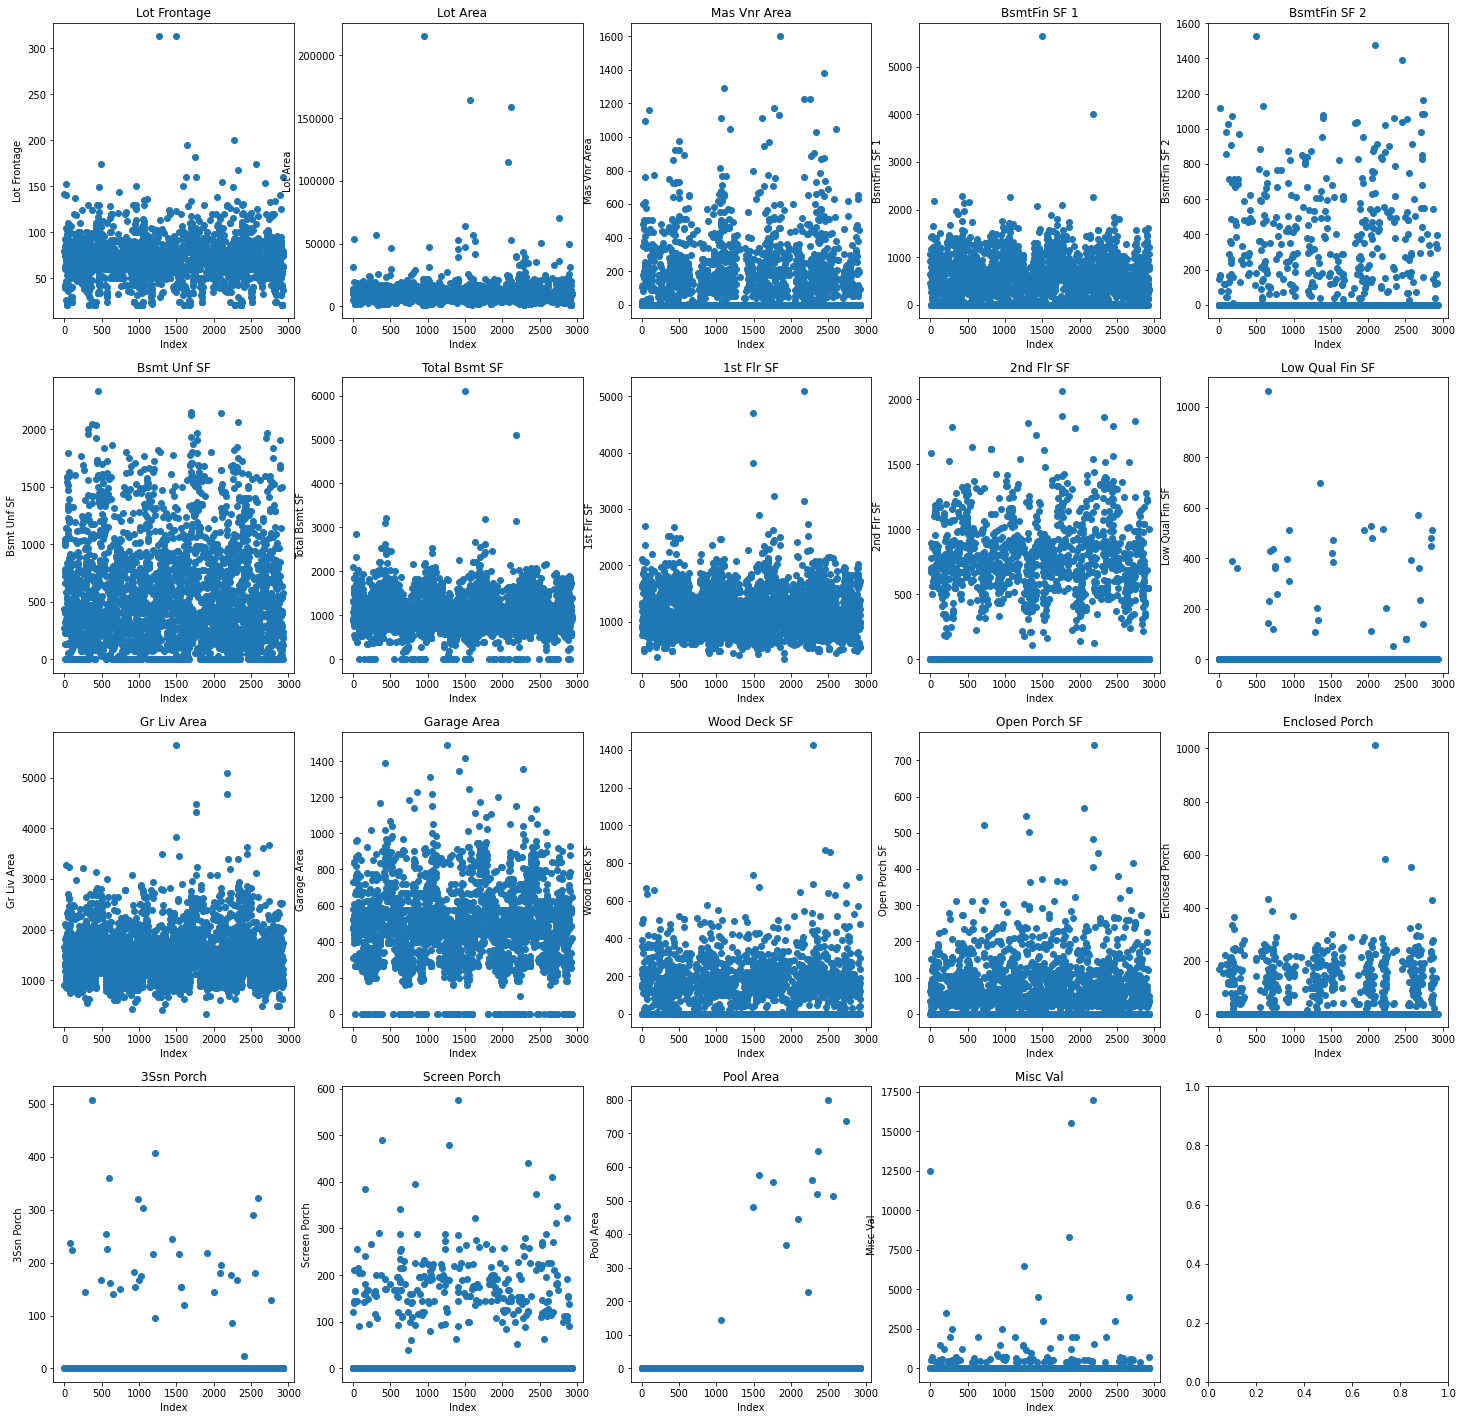

In [35]:
univariate_dist_continous_vars(data)

## Observation: We can observe that all the continous features are on different scales and can be normalized to be on same scale to better predict the SalePrice. ALso we can see many of the features are having lot of zeros.

# 2. Visualize the dependency of the target on each continuous feature (2d scatter plot). [10 Marks]

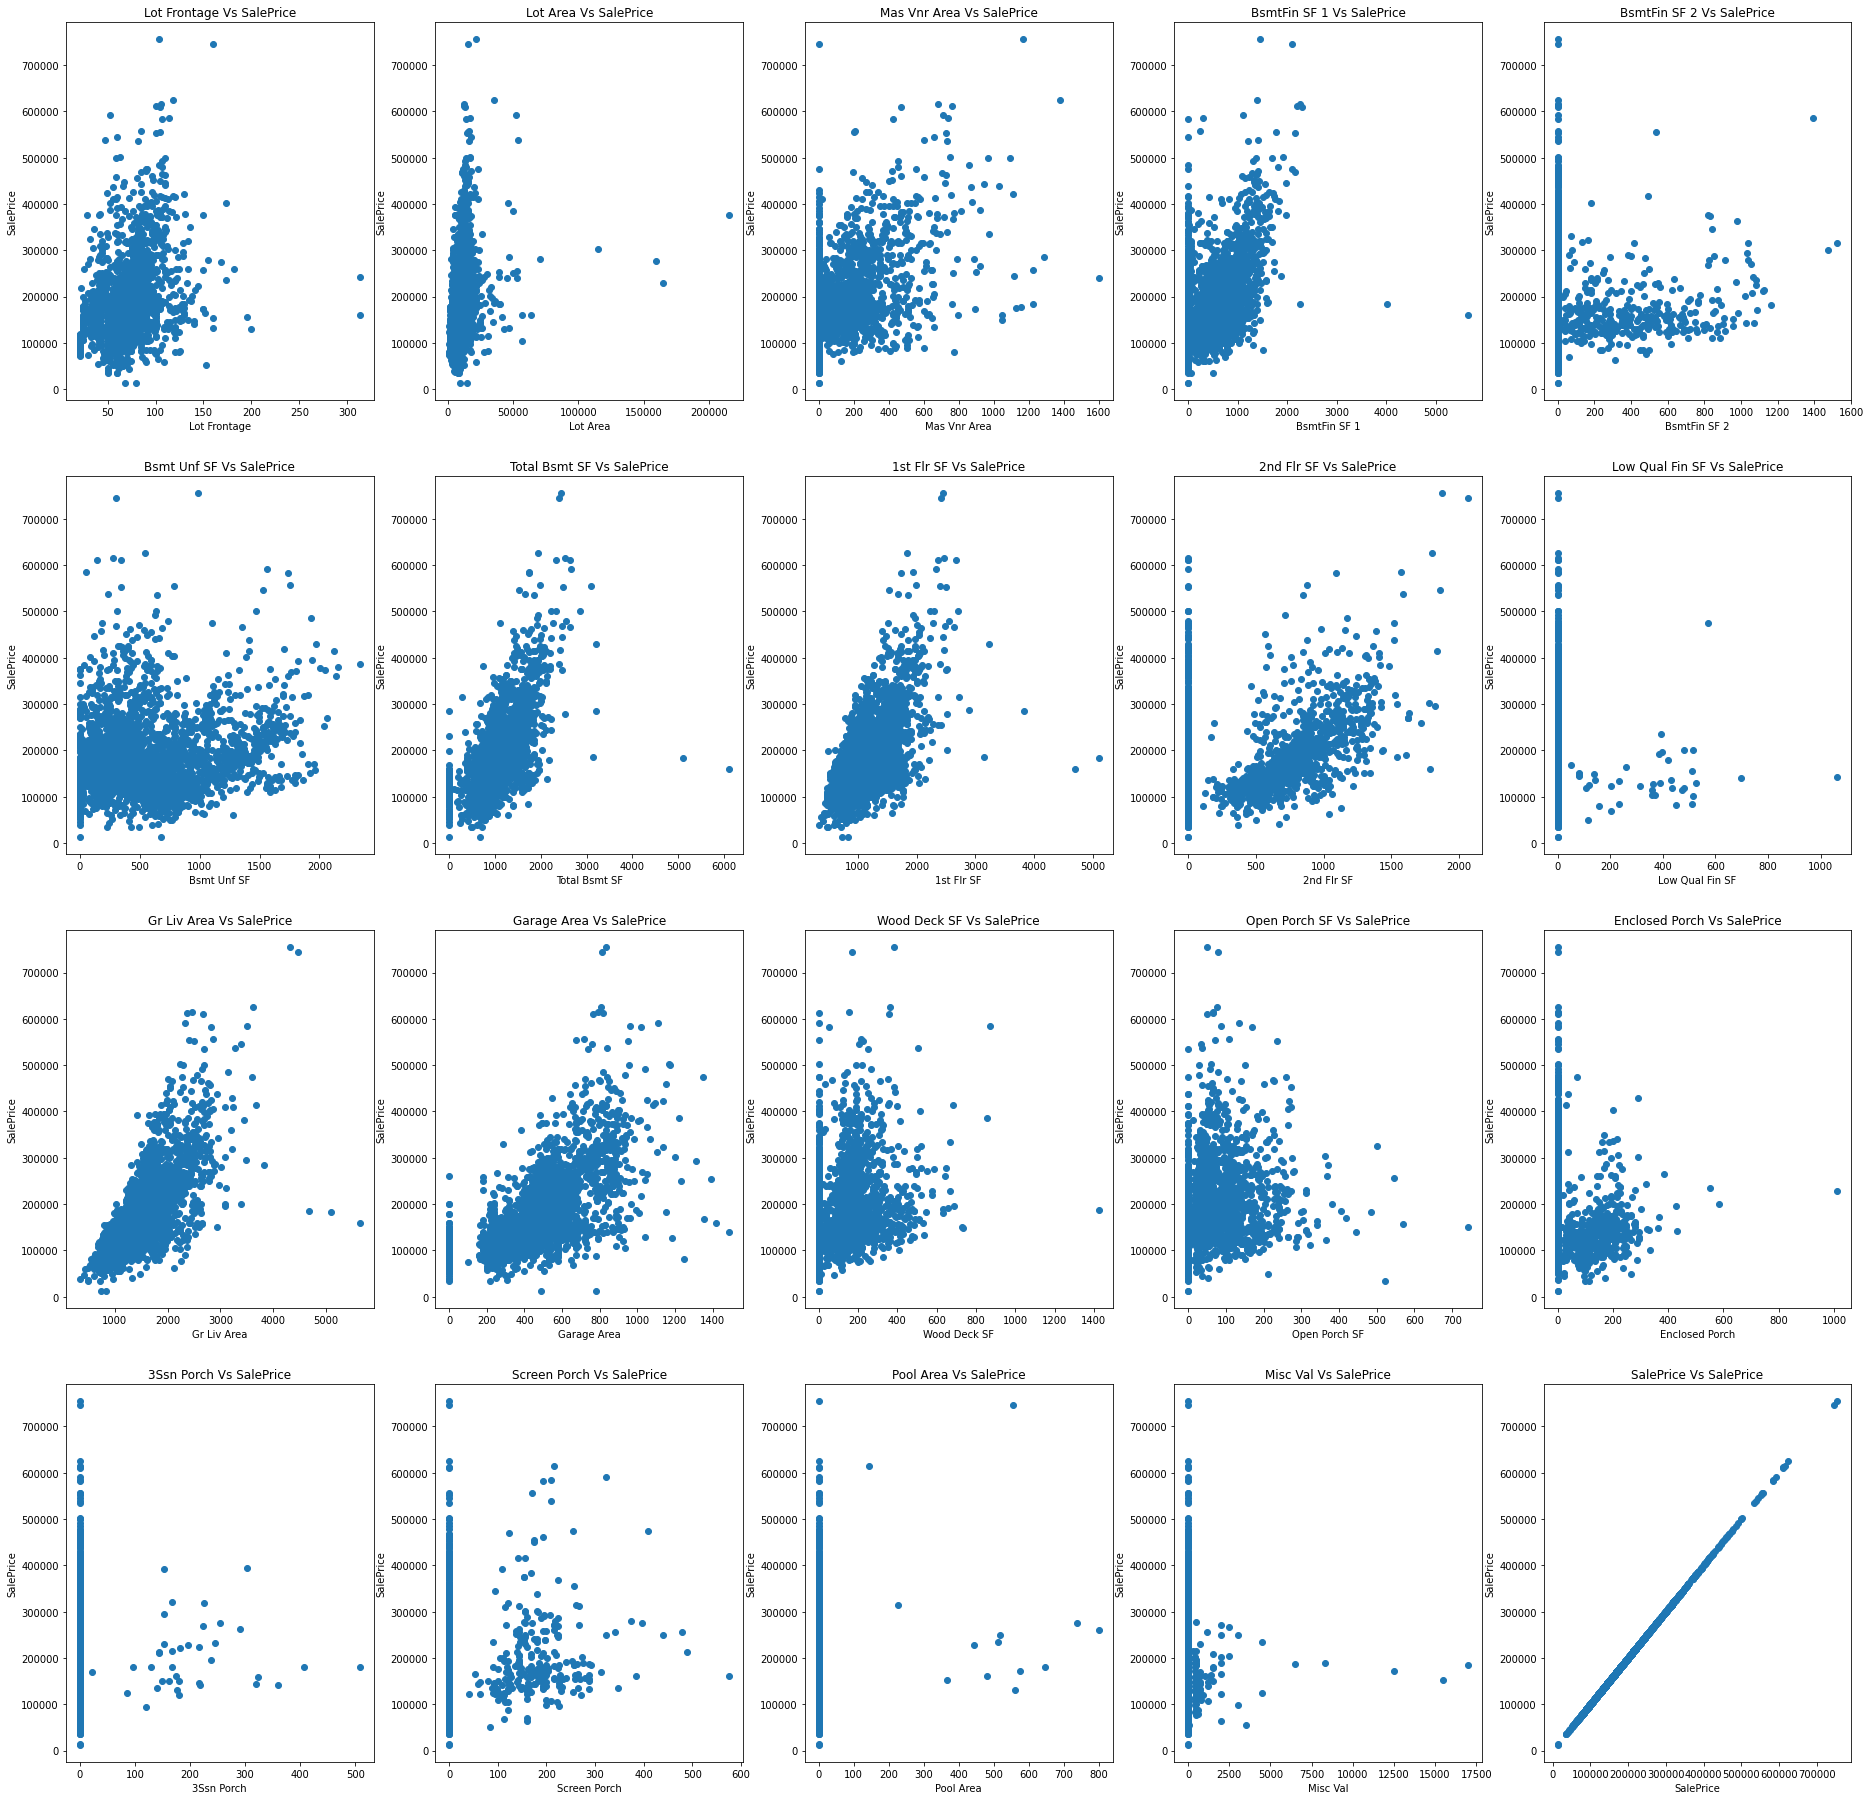

In [36]:
bivariate_dist_continous_vars(data)

# 3. For each categorical (nominal) variable, cross-validate a Linear Regression model using just this variable (onehot-encoded). Visualize the relationship of the categorical variables that provide the best R^2 value with the target. [20 Marks]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(training_data, target, random_state=0)
X_train = X_train[CATEGORICAL_FEATURES_COLUMNS].fillna("N/A")
X_train = X_train[CATEGORICAL_FEATURES_COLUMNS].astype(str)
best_r2_value = float("-inf")
best_corresponding_feature = ""
for each_categorical_col in CATEGORICAL_FEATURES_COLUMNS:
  one_hot_encoder = OneHotEncoder(categories = [X_train[each_categorical_col].unique()])
  pipeline = make_pipeline(one_hot_encoder, LinearRegression())
  curr_r2_value = np.mean(cross_val_score(pipeline, X_train[each_categorical_col].values.reshape(-1,1), y_train, cv=5))
  if(curr_r2_value >= best_r2_value):
    best_r2_value = curr_r2_value
    best_corresponding_feature = each_categorical_col

print("The best corresponding feature is :",best_corresponding_feature,"and it's the r^2 value is:", best_r2_value)  

The best corresponding feature is : Neighborhood and it's the r^2 value is: 0.5613798490017522


## Visualizing the best Corresponding feature Neighbourhood with target(SalePrice)

Text(0.5, 1.0, 'Neighborhood Vs SalePrice')

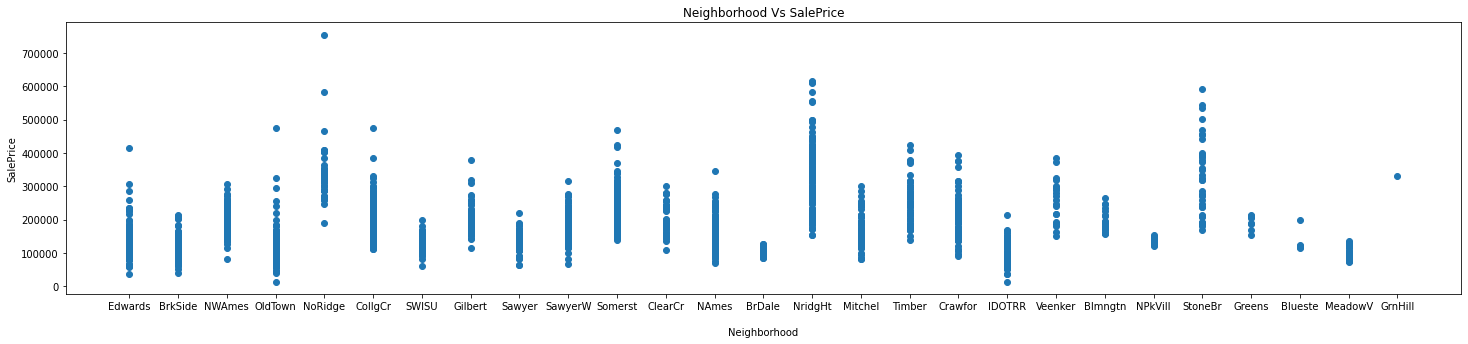

In [38]:
plt.figure(num=None, figsize=(25, 5))
ax1 = plt.gca()
ax1.scatter(X_train[best_corresponding_feature],y_train)
ax1.set_xlabel("\n"+best_corresponding_feature)
ax1.set_ylabel("SalePrice")
ax1.set_title(best_corresponding_feature+" Vs SalePrice")

# 4. Use ColumnTransformer and pipeline to encode nominal, ordinal, discrete variables. Evaluate Linear Regression (OLS), Ridge, Lasso and ElasticNet using cross-validation with the default parameters. Does scaling the data (within the pipeline) with StandardScaler help? Read about ColumnTransformer [here](https://scikit-learn.org/stable/modules/compose.html#column-transformer). [30 Marks]

## Creating a pipeline with ColumnTransformer

In [39]:
preprocesing_pipe,X_train, X_test, y_train, y_test = preprocessing_pipeline(data,training_data,target)
for name,model in MODELS.items():
  print("The "+name+" R^2 score is ::",get_r2_score(X_train,y_train,preprocesing_pipe,model["model"]))


The linear_reg R^2 score is :: 0.8268410423295192
The ridge_reg R^2 score is :: 0.8382229859470438
The lasso_reg R^2 score is :: 0.8301491449422956
The elastic_reg R^2 score is :: 0.8016886605270953


In [40]:
preprocesing_pipe,X_train, X_test, y_train, y_test = preprocessing_pipeline(data,training_data,target,scaler = StandardScaler())
for name,model in MODELS.items():
  print("The"+name+" R^2 score is ::",get_r2_score(X_train,y_train,preprocesing_pipe,model["model"]))

Thelinear_reg R^2 score is :: -2.7241839267975596e+22
Theridge_reg R^2 score is :: 0.8315828174343866
Thelasso_reg R^2 score is :: 0.8311173825264003
Theelastic_reg R^2 score is :: 0.8452918308236683


### Observation: Scaling data within the pipeline is reducing OLS regression whereas improving the ElasticNetRegression while the ridge regression stays constant between both of them, The Lasso regression which was not converging without sclaing is now converging.

#5. Tune the parameters of the models using GridSearchCV. Do the results improve? Visualize the dependence of the validation score on the parameters for Ridge, Lasso and ElasticNet. [20 Marks]


The best score, parameter 0.844 and {'ridge__alpha': 1000.0}



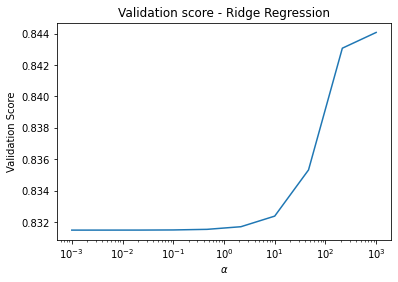

The best score, parameter 0.842 and {'lasso__alpha': 1000.0}



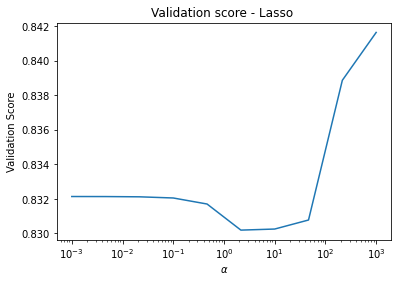

The best score, parameter 0.846 and {'elasticnet__alpha': 0.46415888336127775}



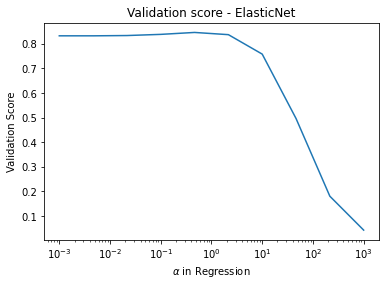

In [41]:
ridge,lasso,elasticnet = tuning_params_regularization(preprocesing_pipe,X_train,y_train)

## **Observation:** There is a increase in score when the parameters are tuned,it might be slight but based on amount of data, it might cover some good amount of correct results.

#6. Visualize the coefficients of the resulting models. Do they agree on which features are important? [10 Marks]

Text(0, 0.5, 'Coefficient value')

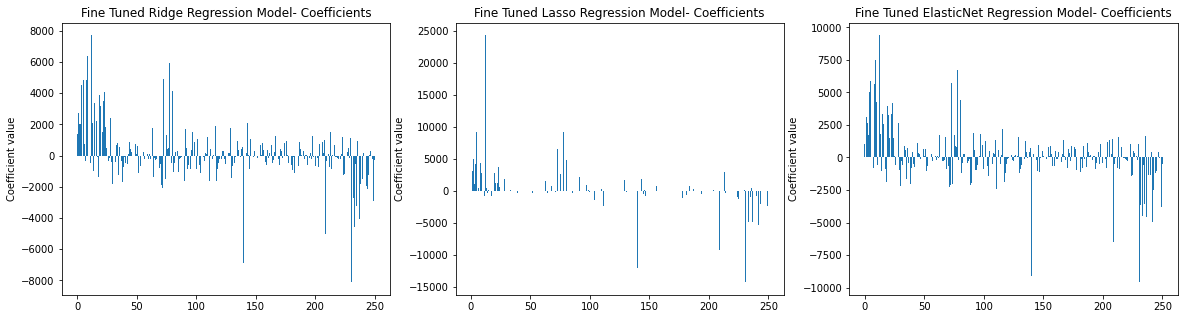

In [42]:
f, axes = plt.subplots(1, 3, figsize=(20, 5))

# X = preprocesing_pipe.fit_transform(X_train)

axes[0].bar(range(len(ridge.named_steps['ridge'].coef_)), ridge.named_steps['ridge'].coef_)
axes[0].set_title('Fine Tuned Ridge Regression Model- Coefficients')
axes[0].set_ylabel('Coefficient value')

axes[1].bar(range(len(lasso.named_steps['lasso'].coef_)), lasso.named_steps['lasso'].coef_ )
axes[1].set_title('Fine Tuned Lasso Regression Model- Coefficients')
axes[1].set_ylabel('Coefficient value')

axes[2].bar(range(len(elasticnet.named_steps['elasticnet'].coef_)), elasticnet.named_steps['elasticnet'].coef_ )
axes[2].set_title('Fine Tuned ElasticNet Regression Model- Coefficients')
axes[2].set_ylabel('Coefficient value')

## **Feature Important based on co_eff**: Based on the plots for co-eff, we can see that the ridge and elasticnet agrees on what features are important lasso have fewer agreements with them. but most of the features are common to all three.